In [313]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
%matplotlib inline

df = pd.read_csv('dataset.csv')

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191154 entries, 0 to 191153
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   state                   191154 non-null  object
 1   state_name              191154 non-null  object
 2   state_fips              191154 non-null  int64 
 3   fema_region             191154 non-null  object
 4   overall_outcome         191154 non-null  object
 5   date                    191154 non-null  object
 6   new_results_reported    191154 non-null  int64 
 7   total_results_reported  191154 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 11.7+ MB


In [290]:
# Converting the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# The total number of PCR tests performed as of yesterday in the United States.

In [291]:
# Total tests performed as of yesterday in the United States
df['new_results_reported'].sum()

1043290261

In [292]:
# Grouping data by state and overall outcome. The .max() method will retrieve the most recent date and the highest value of total_results_reported for each of the three outcomes.
df1 = df.groupby(['state', 'overall_outcome'])[['date', 'total_results_reported']].max()
df1

date  total_results_reported
state overall_outcome                                   
AK    Inconclusive    2023-05-18                    5253
      Negative        2023-05-18                 4393351
      Positive        2023-05-18                  399600
AL    Inconclusive    2023-05-09                   18823
      Negative        2023-05-09                 8067491
...                          ...                     ...
WV    Negative        2023-05-18                 5421317
      Positive        2023-05-18                  623219
WY    Inconclusive    2023-05-19                    4013
      Negative        2023-05-19                 1440594
      Positive        2023-05-19                  138384

[167 rows x 2 columns]

In [293]:
# Summing up total results reported for each outcome of each state from the most recent date provided from the dataset.
df1['total_results_reported'].sum()

1043290261

# The 7-day rolling average number of new cases per day for the last 30 days.

In [294]:
df2 = df[['state', 'date', 'overall_outcome', 'new_results_reported']].set_index('date')

In [295]:
# Filtering only by positive cases
df2_positive = df2[df2['overall_outcome']=='Positive']
df2_positive

,state,overall_outcome,new_results_reported
date,,,
2020-03-01,AL,Positive,16
2020-03-02,AL,Positive,6
2020-03-03,AL,Positive,9
2020-03-04,AL,Positive,2
2020-03-05,AL,Positive,6
...,...,...,...
2023-05-15,WY,Positive,9
2023-05-16,WY,Positive,13
2023-05-17,WY,Positive,6


In [296]:
# Getting a sum of total positive cases reported per day
df_positive = df2_positive.groupby('date')['new_results_reported'].sum().to_frame()
df_positive

,new_results_reported
date,
2020-03-01,63
2020-03-02,85
2020-03-03,35
2020-03-04,113
2020-03-05,115
...,...
2023-05-15,5175
2023-05-16,4676
2023-05-17,4471


In [297]:
# Finding the rolling average count of new positive cases
rolling_avg = df_positive['new_results_reported'].rolling(window=7).mean()

In [298]:
# Since the dataframe is sorted by date, we can use tail to find the last 30 days
last_30_days_rolling_avg = rolling_avg.tail(30)

In [299]:
last_30_days_rolling_avg

date
2023-04-20    9585.714286
2023-04-21    9414.714286
2023-04-22    9254.142857
2023-04-23    9152.142857
2023-04-24    8902.142857
2023-04-25    8712.428571
2023-04-26    8562.571429
2023-04-27    8479.714286
2023-04-28    8391.428571
2023-04-29    8380.714286
2023-04-30    8370.714286
2023-05-01    8268.285714
2023-05-02    8177.714286
2023-05-03    8044.714286
2023-05-04    7984.285714
2023-05-05    7890.142857
2023-05-06    7727.000000
2023-05-07    7636.428571
2023-05-08    7599.000000
2023-05-09    7521.142857
2023-05-10    7330.428571
2023-05-11    6986.285714
2023-05-12    6657.285714
2023-05-13    6404.000000
2023-05-14    6153.857143
2023-05-15    5746.142857
2023-05-16    5195.714286
2023-05-17    4745.857143
2023-05-18    4345.571429
2023-05-19    3817.714286
Name: new_results_reported, dtype: float64

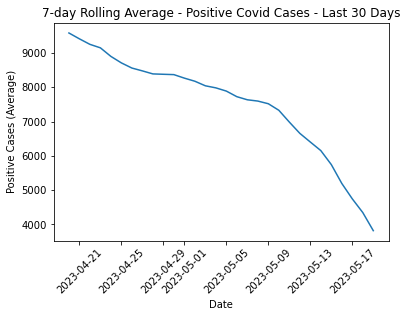

In [316]:
plt.plot(last_30_days_rolling_avg)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Positive Cases (Average)')
plt.title('7-day Rolling Average - Positive Covid Cases - Last 30 Days')
plt.show()

# The 10 states with the highest test positivity rate (positive tests / tests performed) for tests performed in the last 30 days.

In [301]:
last_30_days_date = (date.today()-timedelta(days=30)).isoformat()
last_30_days_date

'2023-04-22'

In [302]:
# Filtering the dataframe to include only the dates from the past 30 days
df3 = df[df['date'] >= last_30_days_date][['date', 'state_name', 'overall_outcome', 'new_results_reported']]
df3

,date,state_name,overall_outcome,new_results_reported
3429,2023-04-22,Alabama,Inconclusive,0
3430,2023-04-22,Alabama,Negative,1309
3431,2023-04-22,Alabama,Positive,83
3432,2023-04-23,Alabama,Inconclusive,0
3433,2023-04-23,Alabama,Negative,1308
...,...,...,...,...
191149,2023-05-18,Wyoming,Negative,118
191150,2023-05-18,Wyoming,Positive,7
191151,2023-05-19,Wyoming,Inconclusive,0
191152,2023-05-19,Wyoming,Negative,19


In [303]:
df4 = df3.groupby('state_name').agg('new_results_reported').sum().to_frame().reset_index()
df4.rename(columns={'new_results_reported': 'total_cases_reported'}, inplace=True)
df4.head()

,state_name,total_cases_reported
0,Alabama,62800
1,Alaska,9664
2,Arizona,59860
3,Arkansas,19082
4,California,602965


In [304]:
df3_positive = df3[df3['overall_outcome']=='Positive']

In [305]:
df3_positive = df3_positive.groupby('state_name')['new_results_reported'].sum().reset_index()
df3_positive.rename(columns={'new_results_reported': 'total_positive_tests'}, inplace=True)

In [306]:
df3_positive.head()

,state_name,total_positive_tests
0,Alabama,2051
1,Alaska,691
2,Arizona,4665
3,Arkansas,1285
4,California,25998


In [307]:
df3_positive['total_cases'] = df4['total_cases_reported']

In [308]:
df3_positive.head()

,state_name,total_positive_tests,total_cases
0,Alabama,2051,62800
1,Alaska,691,9664
2,Arizona,4665,59860
3,Arkansas,1285,19082
4,California,25998,602965


In [309]:
# Renaming the dataframe by creating a copy of df3_positive
df_positivity_rate = df3_positive.copy()

In [310]:
df_positivity_rate['positivity_rate'] = ((df_positivity_rate['total_positive_tests'] / df_positivity_rate['total_cases']) * 100).round(2)
df_positivity_rate.head()

,state_name,total_positive_tests,total_cases,positivity_rate
0,Alabama,2051,62800,3.27
1,Alaska,691,9664,7.15
2,Arizona,4665,59860,7.79
3,Arkansas,1285,19082,6.73
4,California,25998,602965,4.31


In [311]:
df_positivity_rate.sort_values('positivity_rate', ascending=False).head(10)

,state_name,total_positive_tests,total_cases,positivity_rate
45,U.S. Virgin Islands,50,177,28.25
39,Puerto Rico,4046,21739,18.61
25,Missouri,3668,19801,18.52
42,South Dakota,1714,9491,18.06
11,Guam,264,1587,16.64
49,Washington,4825,31287,15.42
28,Nevada,2738,23400,11.70
52,Wyoming,579,4982,11.62
31,New Mexico,1794,16452,10.90
12,Hawaii,2153,21580,9.98


In [312]:
df_positivity_rate[df_positivity_rate['state_name']=='New York']

,state_name,total_positive_tests,total_cases,positivity_rate
32,New York,13481,495281,2.72
